# -- The Case Study 'Credit EDA is divided into 4 parts'
Data Loading & Inspection
Data Cleaning (Removing Null Values & Duplicates)
Data Analysis (Outliers, Uni-variate, Bi-variate)
Recommendations based on above Analysis

In [1]:
#-- Ignore 3rd Party deprecation warnings while importing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#-- Necessary Dependecies are as follows 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)


## Data Loading & Inspection
        Preview data
        Check total number of entries and column types

In [4]:
#-- Read
df = pd.read_csv("application_data.csv")
            

In [5]:
df.shape

(307511, 122)

### The data frame has about 3 lac rows and 122 columns

In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### -- Look for the first few rows of the dataframe

In [7]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [9]:
df.shape

(307511, 122)

In [10]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [11]:
# Numerical columns
df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [12]:
# Categorical columns

list(set(df.columns) - set(df.describe().columns))

['FLAG_OWN_CAR',
 'WALLSMATERIAL_MODE',
 'NAME_EDUCATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'CODE_GENDER',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WEEKDAY_APPR_PROCESS_START']

In [13]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

#### There are 3 data types primarily

##### 65 columns with dtype=float64 , 41 columns with dtype=int64, 16 columns with dtype=object

In [14]:
# Get the aggregate value like, count, size and No of different values for each column
df.agg(['count','size','nunique'])

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
count        307511  307511              307511       307511        307511   
size         307511  307511              307511       307511        307511   
nunique      307511       2                   2            3             2   

         FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count             307511        307511            307511      307511   
size              307511        307511            307511      307511   
nunique                2            15              2548        5603   

         AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
count         307499           307233           306219            307511   
size          307511           307511           307511            307511   
nunique        13672             1002                7                 8   

         NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                 307511              307511             307511   
size                  307511              307511             307511   
nunique                    5                   6                  6   

         REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                        307511      307511         307511   
size                         307511      307511         307511   
nunique                          81       17460          12574   

         DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
count               307511           307511       104582      307511   
size                307511           307511       307511      307511   
nunique              15688             6168           62           2   

         FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
count            307511           307511            307511      307511   
size             307511           307511            307511      307511   
nunique               2                2                 2           2   

         FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count        307511           211120           307509                307511   
size         307511           307511           307511                307511   
nunique           2               18               17                     3   

         REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
count                         307511                      307511   
size                          307511                      307511   
nunique                            3                           7   

         HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count                     307511                      307511   
size                      307511                      307511   
nunique                       24                           2   

         REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                        307511                       307511   
size                         307511                       307511   
nunique                           2                            2   

         REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count                    307511                  307511   
size                     307511                  307511   
nunique                       2                       2   

         LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  \
count                     307511             307511        134133   
size                      307511             307511        307511   
nunique                        2                 58        114584   

         EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
count          306851        246546          151450            127568   
size           307511        307511          307511            307511   
nunique        119831           814            2339              3780   

         YEARS_BEGINEXPLUATATION_AVG  Y

### Analysis of Null values 

In [15]:
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.8723
COMMONAREA_AVG                  69.8723
COMMONAREA_MODE                 69.8723
NONLIVINGAPARTMENTS_AVG         69.4330
NONLIVINGAPARTMENTS_MODE        69.4330
NONLIVINGAPARTMENTS_MEDI        69.4330
FONDKAPREMONT_MODE              68.3862
LIVINGAPARTMENTS_AVG            68.3550
LIVINGAPARTMENTS_MEDI           68.3550
LIVINGAPARTMENTS_MODE           68.3550
FLOORSMIN_AVG                   67.8486
FLOORSMIN_MEDI                  67.8486
FLOORSMIN_MODE                  67.8486
YEARS_BUILD_AVG                 66.4978
YEARS_BUILD_MEDI                66.4978
YEARS_BUILD_MODE                66.4978
OWN_CAR_AGE                     65.9908
LANDAREA_AVG                    59.3767
LANDAREA_MEDI                   59.3767
LANDAREA_MODE                   59.3767
BASEMENTAREA_MODE               58.5160
BASEMENTAREA_AVG                58.5160
BASEMENTAREA_MEDI               58.5160
EXT_SOURCE_1                    56.3811
NONLIVINGAREA_AVG               55.1792


#### There are lot of columns having null values with more percentage

In [16]:
# Get all the columns having more than 48% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) >=48]
print(missing_columns)
len(missing_columns)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

48

### Drop all the columns which have 48% null values

In [17]:
df = df.drop(missing_columns, axis=1)

In [18]:
print(df.shape)

(307511, 74)


In [19]:
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

EMERGENCYSTATE_MODE           47.3983
OCCUPATION_TYPE               31.3455
EXT_SOURCE_3                  19.8253
AMT_REQ_CREDIT_BUREAU_YEAR    13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
NAME_TYPE_SUITE                0.4201
DEF_30_CNT_SOCIAL_CIRCLE       0.3320
OBS_30_CNT_SOCIAL_CIRCLE       0.3320
OBS_60_CNT_SOCIAL_CIRCLE       0.3320
DEF_60_CNT_SOCIAL_CIRCLE       0.3320
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
dtype: float64

In [20]:
# Get all the columns having more than 13% missing values
df.columns[100*(df.isnull().sum()/len(df.index)) >=13]

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'EMERGENCYSTATE_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### The Column OCCUPATION_TYPE is an important column, so we keep it

In [21]:
# Get all the columns having more than 13% missing values
more_missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) >=13]
more_missing_columns[1:]

Index(['EXT_SOURCE_3', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [22]:
df = df.drop(more_missing_columns[1:], axis=1)

In [23]:
df.shape

(307511, 66)

In [24]:
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

OCCUPATION_TYPE             31.3455
NAME_TYPE_SUITE              0.4201
DEF_60_CNT_SOCIAL_CIRCLE     0.3320
OBS_60_CNT_SOCIAL_CIRCLE     0.3320
DEF_30_CNT_SOCIAL_CIRCLE     0.3320
OBS_30_CNT_SOCIAL_CIRCLE     0.3320
EXT_SOURCE_2                 0.2146
AMT_GOODS_PRICE              0.0904
AMT_ANNUITY                  0.0039
CNT_FAM_MEMBERS              0.0007
DAYS_LAST_PHONE_CHANGE       0.0003
dtype: float64

In [25]:
## Check if any rows contain more than 5 null values
len(df[df.isnull().sum(axis=1) > 5].index)

1

In [26]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

 ### Drop  all FLAG_DOCUMENT Columns which are not needed as they are related to documentation & does not reflect behavious of the customer

In [27]:
columns_not_needed = df.columns[df.columns.str.startswith('FLAG_DOC')]

In [28]:
df = df.drop(columns_not_needed, axis=1)
df.shape

(307511, 46)

In [29]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

In [30]:
phone_columns = df.columns[df.columns.str.endswith('PHONE')]

### Drop all phone columns as it is not relevant to our analysis

In [31]:
df = df.drop(phone_columns, axis=1)

In [32]:
df.shape

(307511, 43)

In [33]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_C

In [34]:
df = df.drop(['FLAG_MOBIL', 'FLAG_EMAIL'], axis=1)

In [35]:
df.shape

(307511, 41)

In [36]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

#### So Now we have total 41 columns to work with for our analysis. Lets inspect the datatypes of these columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [38]:
##Check the columns with null values or missing values
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

OCCUPATION_TYPE             31.3455
NAME_TYPE_SUITE              0.4201
DEF_60_CNT_SOCIAL_CIRCLE     0.3320
OBS_60_CNT_SOCIAL_CIRCLE     0.3320
DEF_30_CNT_SOCIAL_CIRCLE     0.3320
OBS_30_CNT_SOCIAL_CIRCLE     0.3320
EXT_SOURCE_2                 0.2146
AMT_GOODS_PRICE              0.0904
AMT_ANNUITY                  0.0039
CNT_FAM_MEMBERS              0.0007
DAYS_LAST_PHONE_CHANGE       0.0003
dtype: float64

In [39]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [40]:
##impute the missing AMT_ANNUITY values with the mean
df.loc[df.AMT_ANNUITY.isnull()==True, 'AMT_ANNUITY'] = df.AMT_ANNUITY.mean()

In [41]:
##impute the missing AMT_GOODS_PROCE with the mean
df.loc[df.AMT_GOODS_PRICE.isnull()==True, 'AMT_GOODS_PRICE'] = df.AMT_GOODS_PRICE.mean()

In [42]:
##IMPUTE the NAME_TYPE_SUITE with the mode(most frequently occuring value)
df.NAME_TYPE_SUITE.fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [43]:
df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [44]:
##impute the missing AMT_SOURCE_2 with the mean
df.loc[df.EXT_SOURCE_2.isnull()==True, 'EXT_SOURCE_2'] = df.EXT_SOURCE_2.mean()

In [45]:
df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
##Following variables cannot be floats as it is the number of days of So change datatype to int
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype(np.int64, errors='ignore')
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype(np.int64, errors='ignore')
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype(np.int64, errors='ignore')
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype(np.int64, errors='ignore')
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(0).astype(np.int64, errors='ignore')
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].fillna(0).astype(np.int64, errors='ignore')
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(0).astype(np.int64,errors='ignore')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [48]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [49]:
df.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [50]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [52]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [53]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [54]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [55]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Since only 4 rows are having XNA values and females are more than males. Impute XNA values with 'F'

In [56]:
df.loc[df['CODE_GENDER']=='XNA', 'CODE_GENDER']= 'F'

In [57]:
 df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [58]:
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

OCCUPATION_TYPE    31.3455
dtype: float64

In [59]:
df.shape

(307511, 41)

In [60]:
#Calculate the % null values in the column OCCUPATIOn TYPE. 
(df.OCCUPATION_TYPE.isnull().sum()/df.OCCUPATION_TYPE.size)*100

31.345545362604916

In [61]:
## Impute the rows with MISSING OCCUPATION_TYPE as 'unknown'


df['OCCUPATION_TYPE'] = np.where(df['OCCUPATION_TYPE'].isnull(),"Unknown",df['OCCUPATION_TYPE'])

In [62]:
df.OCCUPATION_TYPE.isnull().sum()

0

In [63]:
df.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [64]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [65]:
## Delete rows where ORGANIZATION_TYPE = XNA
df = df[df['ORGANIZATION_TYPE']!='XNA']

In [66]:
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [67]:
df.DAYS_BIRTH.describe()

count    252137.000000
mean     -14769.133174
std        3662.573769
min      -25200.000000
25%      -17563.000000
50%      -14573.000000
75%      -11775.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

### Days columns have negative values. Convert it to positive and then to Years

In [68]:
df.DAYS_BIRTH =df.DAYS_BIRTH.apply(lambda x : -x if x < 0 else x)

In [69]:
df.DAYS_BIRTH = df.DAYS_BIRTH.astype(int)

In [70]:
df['AGE'] = df.DAYS_BIRTH//365

In [71]:
df.AGE.head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int32

In [72]:
df.DAYS_EMPLOYED.head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [73]:
df.DAYS_EMPLOYED =df.DAYS_EMPLOYED.apply(lambda x : -x if x < 0 else x)

In [74]:
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.astype(int)

In [75]:
df.DAYS_EMPLOYED.head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int32

In [76]:
df['YEARS_EMPLOYED'] = df.DAYS_EMPLOYED/365

In [77]:
df.YEARS_EMPLOYED.head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: YEARS_EMPLOYED, dtype: float64

In [78]:
df.DAYS_REGISTRATION.head()

0   -3648
1   -1186
2   -4260
3   -9833
4   -4311
Name: DAYS_REGISTRATION, dtype: int64

In [79]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.apply(lambda x : -x if x < 0 else x)

In [80]:
df.DAYS_REGISTRATION.head()

0    3648
1    1186
2    4260
3    9833
4    4311
Name: DAYS_REGISTRATION, dtype: int64

In [81]:
df['YEARS_REGISTRATION'] = df.DAYS_REGISTRATION/365

In [82]:
df.YEARS_REGISTRATION.head()

0     9.994521
1     3.249315
2    11.671233
3    26.939726
4    11.810959
Name: YEARS_REGISTRATION, dtype: float64

In [83]:
df.DAYS_LAST_PHONE_CHANGE.head()

0   -1134
1    -828
2    -815
3    -617
4   -1106
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [84]:
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.apply(lambda x : -x if x < 0 else x)

In [85]:
df.DAYS_LAST_PHONE_CHANGE.head()

0    1134
1     828
2     815
3     617
4    1106
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [86]:
df['YEARS_LAST_PHONE_CHANGE'] = df.DAYS_LAST_PHONE_CHANGE/365

In [87]:
df.YEARS_LAST_PHONE_CHANGE.head()

0    3.106849
1    2.268493
2    2.232877
3    1.690411
4    3.030137
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [88]:
((df.isnull().sum()[df.isnull().sum() > 0]/len(df)).round(6) * 100).sort_values(ascending=False)

Series([], dtype: float64)

#### Data is all Clean and there are no missing values 
    1) Imputed the nulll values the values with mean or median or mode based on the data type.
    2) Changed the datatypes of all days from float to int
    3) Converted days to years where needed


## Outlier Analysis for Categorical variables

In [89]:
df.CNT_CHILDREN.describe()

count    252137.000000
mean          0.498515
std           0.763161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

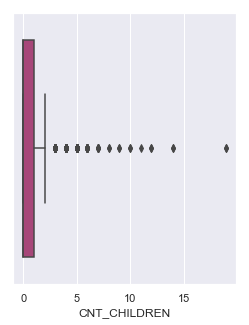

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.CNT_CHILDREN, palette='magma')
plt.show()

In [ ]:
## Get rid of the outlier values by substituting with the Upper fence value
IQR = df['CNT_CHILDREN'].quantile(.75) - df['CNT_CHILDREN'].quantile(.25)
fence_value = df['CNT_CHILDREN'].quantile(.75)+1.5*IQR
print(fence_value)

2.5


In [ ]:
## 2.5 Children is impossible to have, so we round it to 3
df.loc[df.CNT_CHILDREN >fence_value, 'CNT_CHILDREN'] = 3

In [ ]:
df.CNT_CHILDREN.value_counts()

0    161911
1     59698
2     26365
3      4163
Name: CNT_CHILDREN, dtype: int64

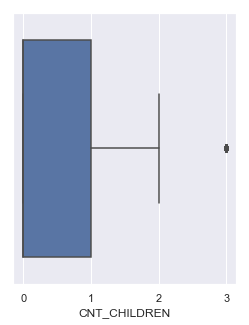

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.CNT_CHILDREN)
plt.show()

In [ ]:
df.CNT_FAM_MEMBERS.describe()

count    252137.000000
mean          2.252506
std           0.942134
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

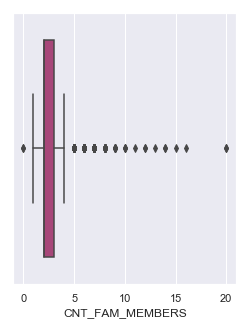

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.CNT_FAM_MEMBERS, palette='magma')
plt.show()

In [ ]:
## Get rid of the outlier values by substituting with the Upper fence value
IQR = df['CNT_FAM_MEMBERS'].quantile(.75) - df['CNT_FAM_MEMBERS'].quantile(.25)
fence_value = df['CNT_FAM_MEMBERS'].quantile(.75)+1.5*IQR
print(fence_value)

4.5


In [ ]:
## 4.5 Children is impossible to have, so we round it to 5
df.loc[df.CNT_FAM_MEMBERS >fence_value, 'CNT_FAM_MEMBERS'] = 5

In [ ]:
df.CNT_FAM_MEMBERS.value_counts()

2    123330
3     51467
1     49049
4     24360
5      3929
0         2
Name: CNT_FAM_MEMBERS, dtype: int64

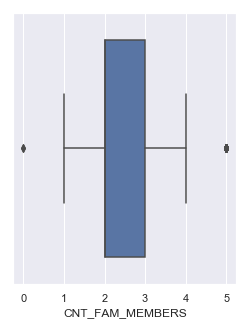

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

## Outlier Analysis of Numerical Variables like Income, Credit, Annuity, Goods_price

In [ ]:
df.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

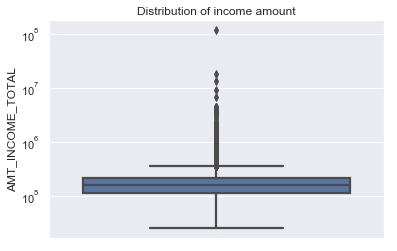

In [ ]:
# Box plotting for univariate variables analysis in logarithmic scale of AMT_TOTAL_INCOME
plt.title('Distribution of income amount')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.boxplot(df.AMT_INCOME_TOTAL,orient='v')
plt.show()

In [ ]:
IQR = df['AMT_INCOME_TOTAL'].quantile(.75)-df['AMT_INCOME_TOTAL'].quantile(.25)
upper_fence = df['AMT_INCOME_TOTAL'].quantile(.75)+1.5*(IQR)
df[df['AMT_INCOME_TOTAL'] >upper_fence]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
22          100026       0         Cash loans           F            N   
51          100059       0         Cash loans           M            Y   
59          100070       0         Cash loans           M            Y   
142         100164       0         Cash loans           F            Y   
280         100323       0         Cash loans           M            Y   
288         100333       0         Cash loans           F            N   
319         100366       0    Revolving loans           M            Y   
323         100371       0         Cash loans           F            Y   
332         100380       0         Cash loans           F            N   
341         100393       0         Cash loans           M            Y   
357         100411       0         Cash loans           M            Y   
366         100421       0         Cash loans           M            Y   
367         100423       0         Cash loans           F            Y   
391         100454       0    Revolving loans           M            Y   
405         100469       0    Revolving loans           M            Y   
409         100473       0         Cash loans           M            Y   
410         100474       0    Revolving loans           M            Y   
411         100475       0    Revolving loans           F            Y   
416         100480       0         Cash loans           M            N   
426         100492       0         Cash loans           F            N   
429         100496       0         Cash loans           F            N   
441         100508       0         Cash loans           F            Y   
485         100559       0         Cash loans           F            Y   
537         100621       0         Cash loans           M            Y   
622         100712       0         Cash loans           M            N   
632         100722       0         Cash loans           M            Y   
675         100781       0         Cash loans           M            Y   
688         100796       1         Cash loans           F            N   
701         100810       0    Revolving loans           M            Y   
765         100879       1         Cash loans           F            Y   
775         100889       0    Revolving loans           F            Y   
834         100954       0    Revolving loans           F            N   
871         100999       0         Cash loans           M            Y   
888         101019       0         Cash loans           F            N   
930         101073       1         Cash loans           F            Y   
963         101113       0         Cash loans           F            N   
1049        101218       0         Cash loans           M            Y   
1057        101228       0         Cash loans           M            N   
1146        101341       0         Cash loans           F            Y   
1238        101461       0         Cash loans           M            Y   
1306        101535       0         Cash loans           F            N   
1316        101545       0         Cash loans           M            Y   
1334        101566       0         Cash loans           F            N   
1408        101653       0         Cash loans           F            Y   
1450        101705       1    Revolving loans           M            N   
1504        101769       0    Revolving loans           M            Y   
1527        101795       0         Cash loans           F            Y   
1566        101837       0         Cash loans           M            Y   
1568        101839       0         Cash loans           F            N   
1586        101857       0         Cash loans           F            N   
1625        101907       0         Cash loans           F            N   
1644        101929       1    Revolving loans           F            Y   
1674        101959       0         Cash loans           F            N   
1692        

#### Points to be concluded from the above graph
    1) There are outliers in the income amount of Customers
    2) 3rd Quartile is slimmer as compared to the first quartile
    3) Income amount mostly lies in the first quartile range


In [ ]:
#### Approximately 8752 rows are outlier data for AMT_INCOME_TOTAL. Lets delete it as it is not much data
df = df[df['AMT_INCOME_TOTAL'] <= upper_fence]

In [ ]:
df['AMT_INCOME_TOTAL'].describe()

count    243385.000000
mean     163140.291774
std       68118.127384
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      360000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
df.AMT_CREDIT.describe()

count    2.433850e+05
mean     5.962438e+05
std      3.919002e+05
min      4.500000e+04
25%      2.710665e+05
50%      5.130405e+05
75%      8.086500e+05
max      3.860019e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
IQR = df['AMT_CREDIT'].quantile(.75)-df['AMT_CREDIT'].quantile(.25)
upper_fence = df['AMT_CREDIT'].quantile(.75)+1.5*(IQR)
df[df['AMT_CREDIT'] >upper_fence]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
60          100071       0         Cash loans           F            N   
135         100157       0         Cash loans           M            N   
189         100219       0         Cash loans           M            N   
235         100273       1         Cash loans           F            N   
314         100361       0         Cash loans           M            N   
337         100389       0         Cash loans           M            Y   
374         100431       0         Cash loans           F            N   
536         100620       0         Cash loans           F            N   
639         100730       0         Cash loans           F            N   
667         100771       0         Cash loans           M            N   
702         100811       0         Cash loans           M            N   
748         100861       0         Cash loans           M            N   
1005        101163       0         Cash loans           M            N   
1046        101215       0         Cash loans           M            N   
1243        101468       0         Cash loans           M            Y   
1446        101701       0         Cash loans           F            Y   
1530        101798       0         Cash loans           F            Y   
1570        101841       0         Cash loans           F            Y   
1593        101865       0         Cash loans           M            Y   
1630        101912       0         Cash loans           M            Y   
1662        101947       0         Cash loans           F            N   
1707        101996       0         Cash loans           F            N   
1874        102196       0         Cash loans           F            Y   
1969        102310       0         Cash loans           F            N   
2240        102627       0         Cash loans           F            N   
2265        102654       0         Cash loans           M            Y   
2271        102661       0         Cash loans           F            N   
2331        102728       0         Cash loans           M            Y   
2363        102765       0         Cash loans           F            Y   
2389        102793       0         Cash loans           M            Y   
2409        102814       0         Cash loans           M            Y   
2454        102861       0         Cash loans           F            Y   
2514        102934       0         Cash loans           M            Y   
2626        103066       0         Cash loans           F            N   
2838        103312       0         Cash loans           M            Y   
2871        103350       0         Cash loans           M            N   
2925        103411       0         Cash loans           F            N   
3254        103797       0         Cash loans           F            N   
3263        103806       0         Cash loans           M            N   
3380        103948       0         Cash loans           F            N   
3386        103954       0         Cash loans           M            N   
3451        104028       0         Cash loans           F            N   
3453        104030       0         Cash loans           F            N   
3464        104042       0         Cash loans           M            Y   
3500        104085       0         Cash loans           F            N   
3522        104113       0         Cash loans           M            Y   
3569        104170       0         Cash loans           M            N   
3658        104266       0         Cash loans           F            Y   
3667        104277       0         Cash loans           F            N   
3672        104283       0         Cash loans           F            Y   
3714        104335       0         Cash loans           F            Y   
3887        104547       0         Cash loans           M            Y   
4027        104709       0         Cash loans           M            Y   
4045        

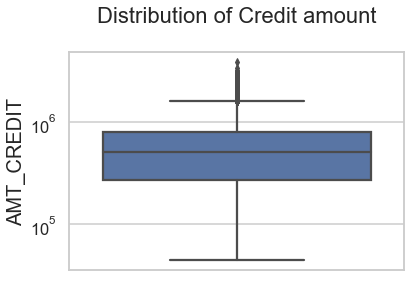

In [ ]:
# Box plotting for univariate variables analysis in logarithmic scale of AMT_CREDIT
plt.title('Distribution of Credit amount')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.boxplot(df.AMT_CREDIT,orient='v')
plt.show()

#### Points to be concluded from the above graph
    1) There are outliers in the credit amount of Customers
    2) 3rd Quartile is slimmer as compared to the first quartile
    3) Credit amount mostly lies in the first quartile range


In [ ]:
df.AMT_ANNUITY.describe()

count    243385.000000
mean      27145.013071
std       13752.067097
min        1980.000000
25%       16875.000000
50%       25407.000000
75%       34740.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

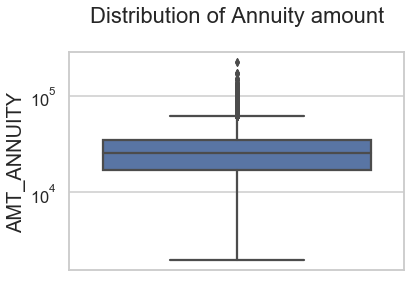

In [ ]:
# Box plotting for univariate variables analysis in logarithmic scale of AMT_ANNUITY
plt.title('Distribution of Annuity amount')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.boxplot(df.AMT_ANNUITY,orient='v')
plt.show()

#### Points to be concluded from the above graph
    1) There are outliers in the Annuity amount of Customers
    2) 3rd Quartile is slimmer as compared to the first quartile
    3) Annuity amount mostly lies in the first quartile range


In [ ]:
df.AMT_GOODS_PRICE.describe()

count    2.433850e+05
mean     5.349259e+05
std      3.582914e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      3.555000e+06
Name: AMT_GOODS_PRICE, dtype: float64

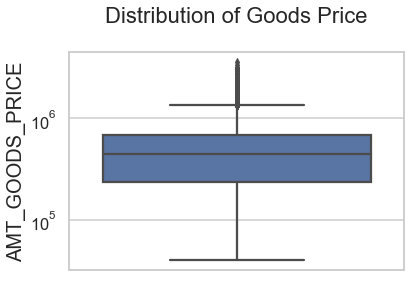

In [ ]:
# Box plotting for univariate variables analysis in logarithmic scale of AMT_GOODS_PRICE
plt.title('Distribution of Goods Price')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.boxplot(df.AMT_GOODS_PRICE,orient='v')
plt.show()

#### Points to be concluded from the above graph
    1) There are outliers in the Goods price amount of Customers
    2) 3rd Quartile is slimmer as compared to the first quartile
    3) Goods price amount mostly lies in the first quartile range


In [ ]:
df['YEARS_EMPLOYED'].describe()

count    243385.000000
mean          6.510114
std           6.410867
min           0.000000
25%           2.084932
50%           4.484932
75%           8.665753
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

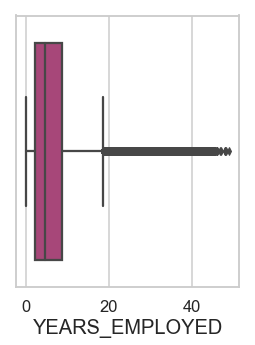

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.YEARS_EMPLOYED, palette='magma')
plt.show()

In [ ]:
## Get rid of the outlier values by substituting with the Upper fence value
IQR = df['YEARS_EMPLOYED'].quantile(.75) - df['YEARS_EMPLOYED'].quantile(.25)
fence_value = df['YEARS_EMPLOYED'].quantile(.75)+1.5*IQR
print(fence_value)

18.536986301369865


In [ ]:
## 18.5 is the upper fence value
df.loc[df.YEARS_EMPLOYED >fence_value, 'YEARS_EMPLOYED'] = 18.5

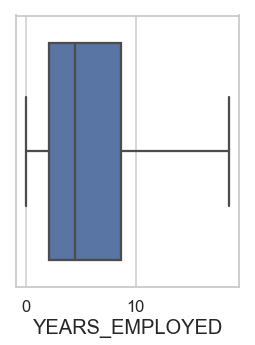

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(df.YEARS_EMPLOYED)
plt.show()

#### Outliers are treated as per below
    1) Imputed values with Upper Fence Value which are greater than Upper Fence Limit
    2) Deleting the records greater than Upper Fence Limit for which number of affected rows are more
    3) If number of affected rows are less it is left as it is
    

## The frequency distribution of the target variable

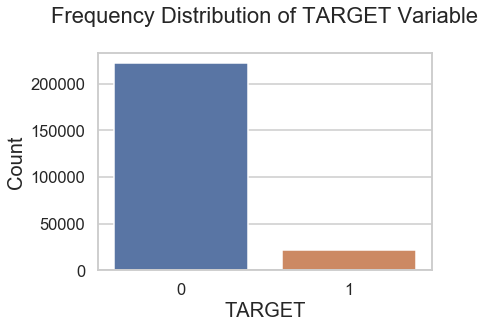

In [ ]:
sns.countplot(df.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.title("Frequency Distribution of TARGET Variable")
plt.show()

In [ ]:
target_variable =(df.TARGET.value_counts()/df.TARGET.size)*100


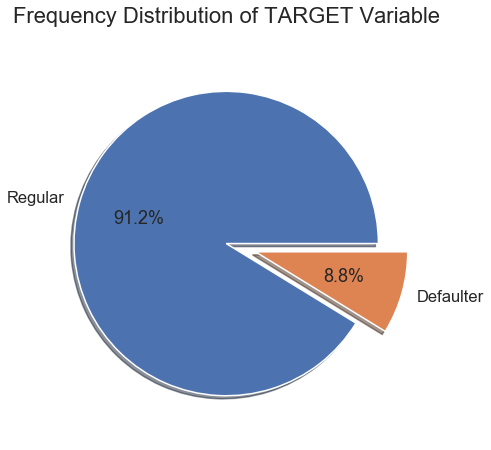

In [ ]:
#There is a huge Data imbalance in Regular payers & Defaulters
target_variable
target_type = ["Regular", "Defaulter"]
myExplode = [0, 0.2]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(target_variable, labels = target_type, explode=myExplode, shadow=True,autopct='%1.1f%%')
plt.title("Frequency Distribution of TARGET Variable")
plt.show()

In [ ]:
Data_Imbalance= target_variable[0]/target_variable[1]
Data_Imbalance

10.418484635233405

#### There is a big Data Imbalance and the Ratio of imbalance is 10.41

In [ ]:
# categorical columns are:

cat_col = list(set(df.columns) - set(df.describe().columns))
cat_col

['FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START']

## Univariate Analysis of Categorical Variables


In [ ]:
def compare_stats(df_y, feature,label_rotation=False,horizontal_layout=True):
    temp = df_y[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Count': temp.values})

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    sns.set_style('darkgrid')
    s = sns.barplot(ax=ax1, x = feature, y="Count",data=df1,  palette='magma')
    if(label_rotation==True):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    df_3 = pd.DataFrame()
    df_3['Regulars']= ((df_y.loc[df_y['TARGET']==0][feature].value_counts())/len(df_y[df_y['TARGET']==0]))
    df_3['Defaulters']= ((df_y.loc[df_y['TARGET']==1][feature].value_counts())/len(df_y[df_y['TARGET']==1]))
    
    sns.set_color_codes("pastel")
    sns.set_style('darkgrid')
    s = df_3.plot.bar(ax=ax2, color=['#5cb85c','#5bc0de','#d9534f'])
    plt.ylabel('Percentage of payments')
        
    if(label_rotation==True):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    else:
        s.set_xticklabels(s.get_xticklabels(),rotation=0)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show();

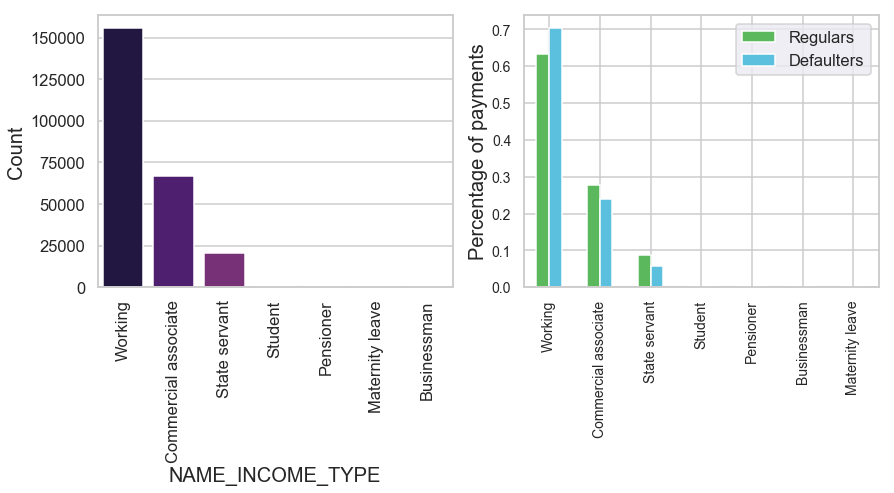

In [ ]:
compare_stats(df, 'NAME_INCOME_TYPE',True)

#### Points to be concluded from the above graph.
    1) Clients applying for loans are from Working, Commercial Associate and State Servant Categories
    2) Defaulters are also mainly from working, Commercial Associate and state servant categories.
    3) There are more defaulters in the working catergories than in the other categories
        Have to be careful about approving loan for the working Category

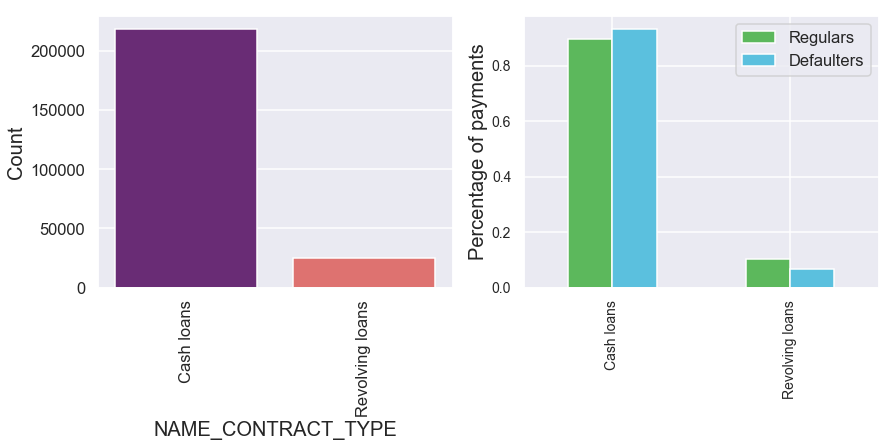

In [ ]:
compare_stats(df, 'NAME_CONTRACT_TYPE',True)

#### Points to be concluded from the above graph.
    1) The Revolving loans are small compared to Cash loans 
    2) No of defaulters in cash loans are higher than in revolving loans
    3) Need to be careful and do thorough due diligence while approving a cash loan

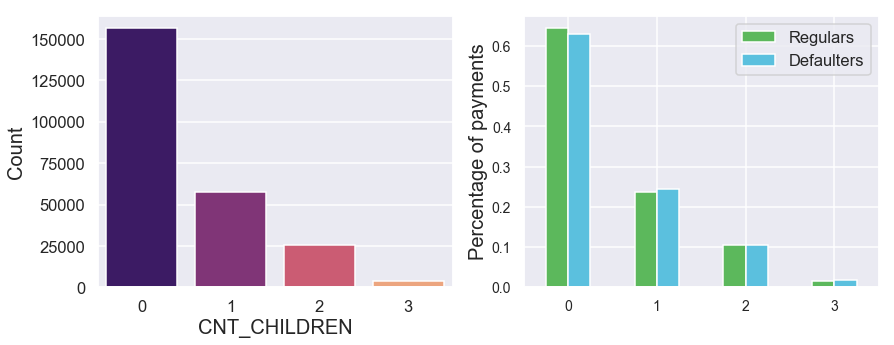

In [ ]:
compare_stats(df, 'CNT_CHILDREN')

#### Points to be concluded from the above graph
    1) Maximum no. of loan applicants are from people who don't have children
    2) Maximum % of Applicants who are defaulters are the ones with 1 or more Children

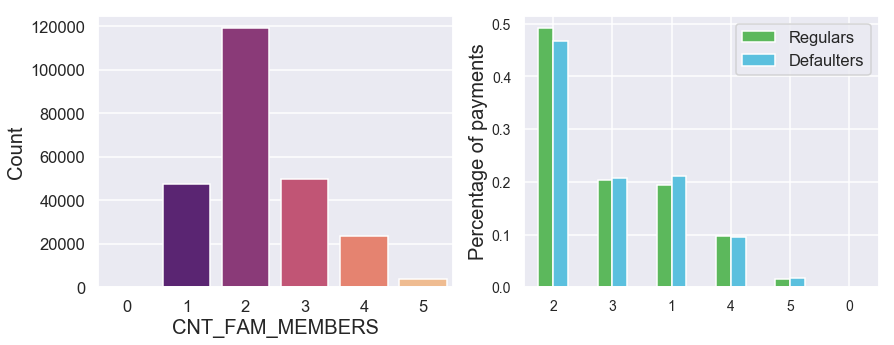

In [ ]:
compare_stats(df, 'CNT_FAM_MEMBERS')

#### Points to be concluded from the above graph
    1) Most of the applicants  have a family of 2.
    2) Maximum % of Applicants who are defaulters are the ones with 2 or more family members


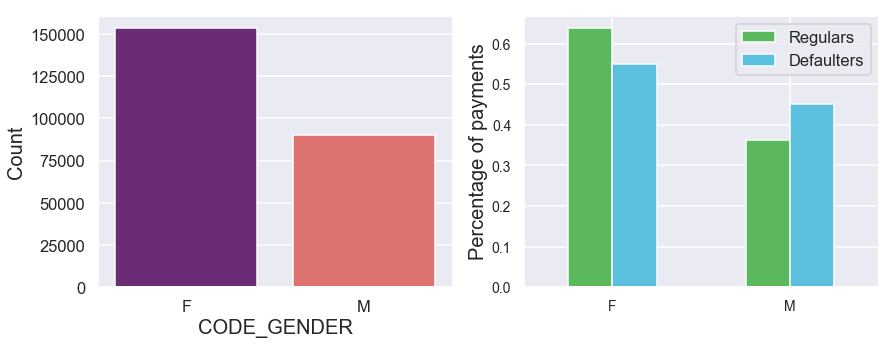

In [ ]:
compare_stats(df, 'CODE_GENDER')

#### Points to be concluded from the above graph
    1) Female Applicants are more than male Applicants
    2) Men seem to be maximum defaulters when compared to females


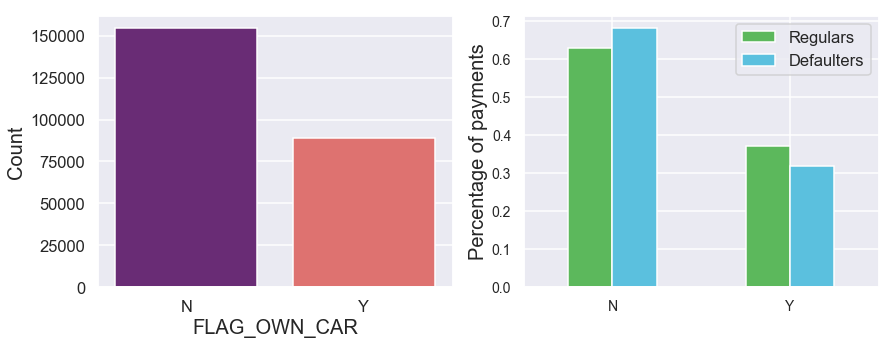

In [ ]:
compare_stats(df,'FLAG_OWN_CAR')

#### Points to be concluded from the above graph
    1) Applicants without a car are more in number than applicants with a car
    2) Clients without a car seem to be defaulting more when compared to people with cars

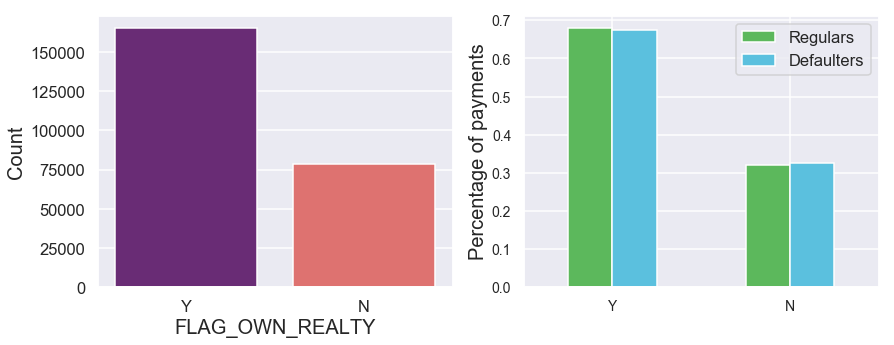

In [ ]:
compare_stats(df,'FLAG_OWN_REALTY')

#### Points to be concluded from the above graph
    1) Applicants with a house are borrowing more than applicants without a house
    2) Defaulters with a house  are more than defaulters without a house


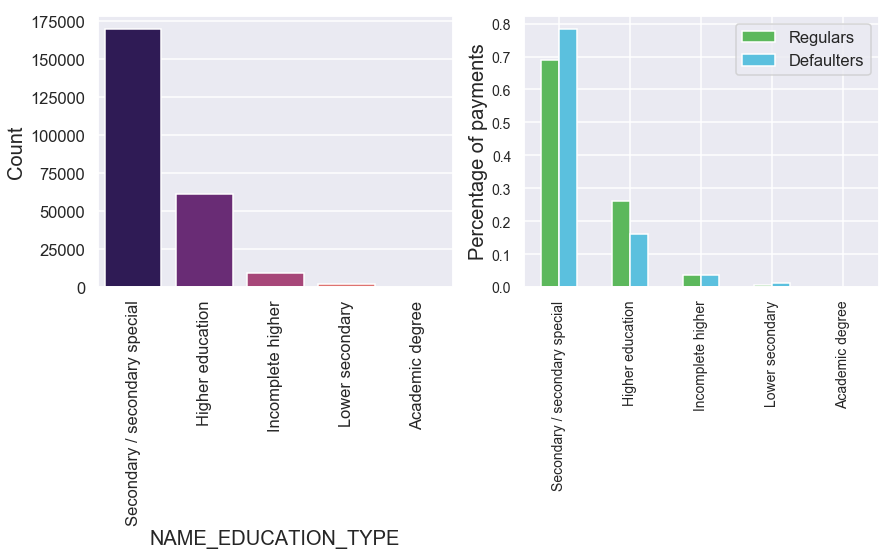

In [ ]:
compare_stats(df,'NAME_EDUCATION_TYPE', True)

#### Points to be concluded from the above graph
    1) The Education Background of most of the loan applicants is Secondary Education
    2) Maximum defaults are also from that category


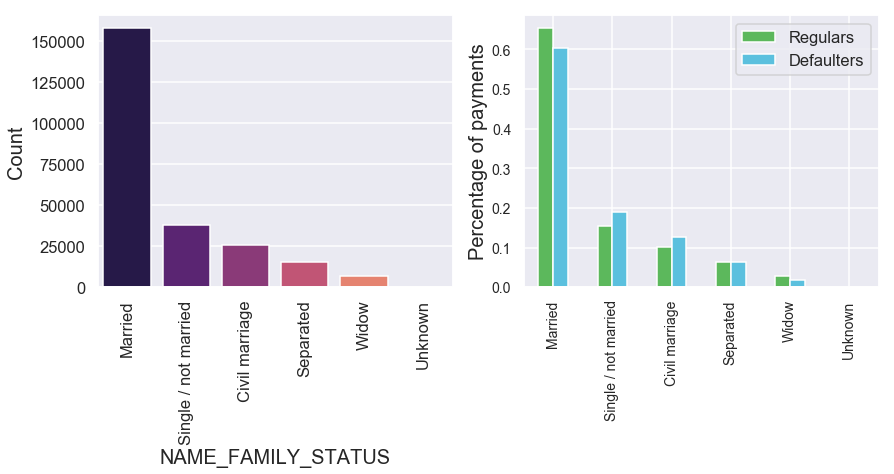

In [ ]:
compare_stats(df,'NAME_FAMILY_STATUS',True)

#### Points to be concluded from the above graph
    1) Married people are the maximum borrowers
    2) While Defaulters are mostly from all types of family status
    3) Maximum defaulters are married people


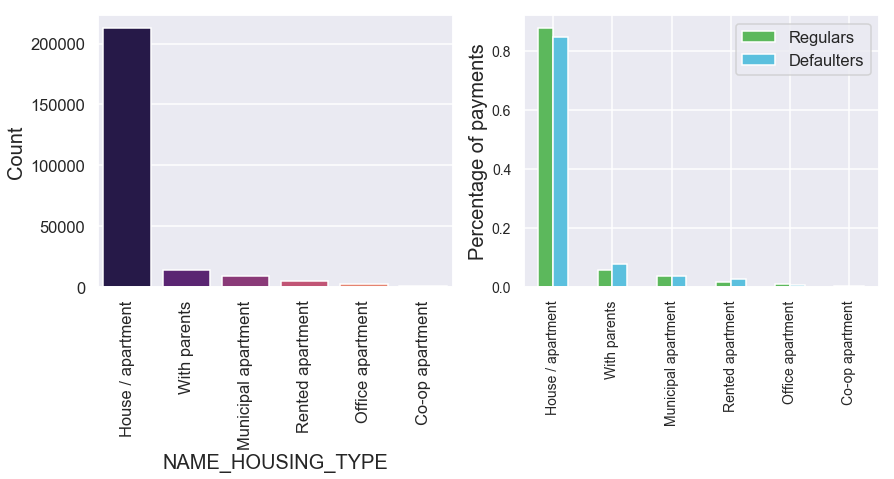

In [ ]:
compare_stats(df,"NAME_HOUSING_TYPE",True)

#### Points to be concluded from the above graph
    1) Clients who are living in a house or an apartment apply the most for the loans
    2) These are the same category of people who are the maximum defaulters
    3) % of clients living with parents default more


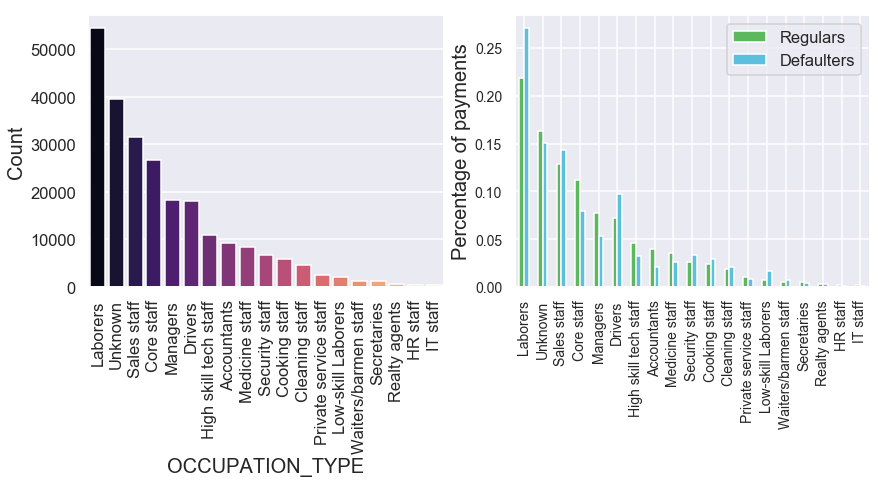

In [ ]:
compare_stats(df,"OCCUPATION_TYPE",True)

#### Points to be concluded from the above graph
    1) Maximum defaulters are labourers, Sales Staff, Core Staff and Drivers

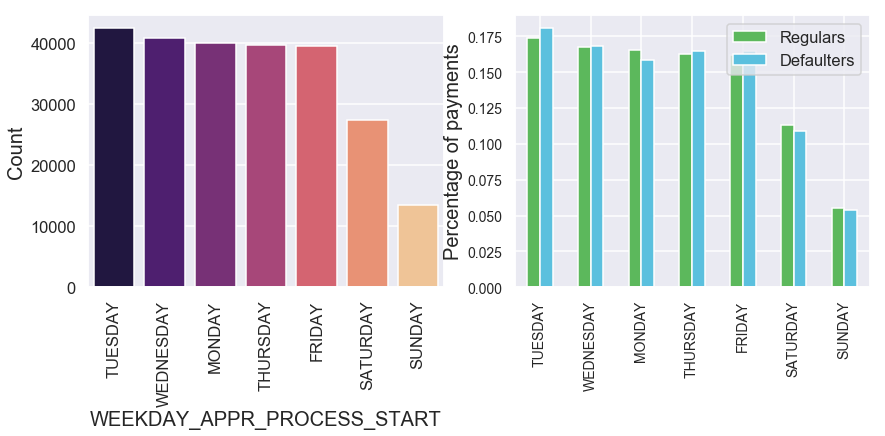

In [ ]:
compare_stats(df,"WEEKDAY_APPR_PROCESS_START",True)

#### Points to be concluded from the above graph
    1) 1) Tuesdays is the most busiest in application processing compared to all other days.
    2) Most of the defaulters applications was processed on a Tuesday


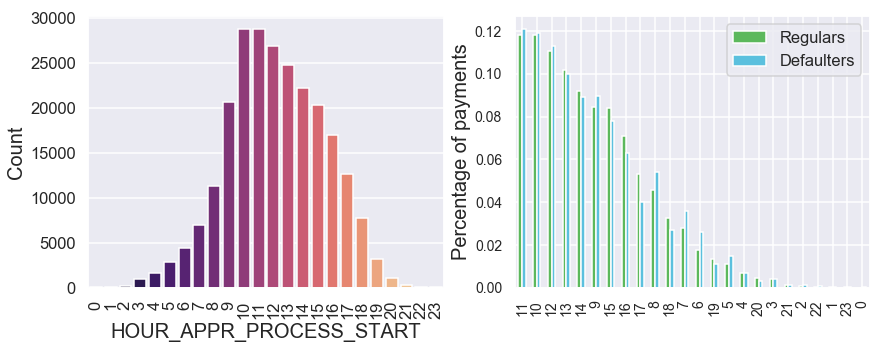

In [ ]:
compare_stats(df,"HOUR_APPR_PROCESS_START",True)

#### Points to be concluded from the above graph
    1) The busiest time of the day for application processing is between 10 – 11 am
    2) Most Default Applications are processed during the same time


### Binning the continuous data for better analysis

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
slot = ['0-10', '10-20', '20-30', '30-40', '40-50','50-60','60-70', '70-80', '80-90', '90-100']

df['AGE_RANGE']=pd.cut(df['AGE'],bins,labels=slot)

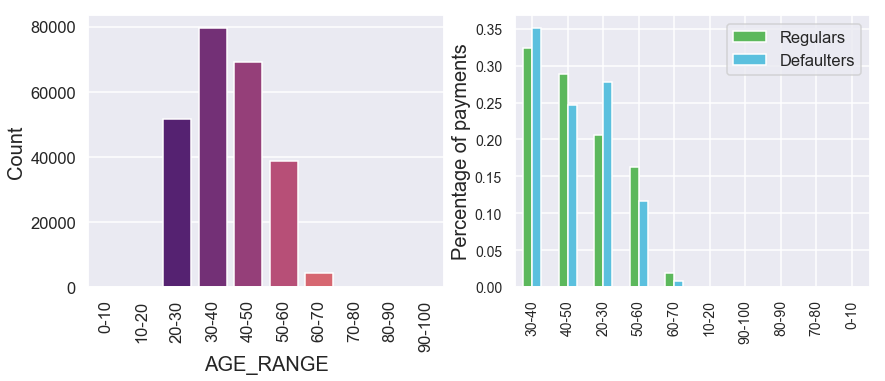

In [ ]:
compare_stats(df,'AGE_RANGE',True)

#### Points to be concluded from the above graph
    1) Most of the Applicants fall under the age group 30-40, 40-50 and 20-30 years,
       30-40 being the maximum category
    2) Maximum defaulters are in the age range 30-40 years and 20-30 years


In [ ]:
bins = [0,5,10,15,20]
slot = ['0-5', '5-10', '10-15', '15-20']

df['EXP_RANGE']=pd.cut(df['YEARS_EMPLOYED'],bins,labels=slot)

In [ ]:
df['YEARS_EMPLOYED'].max()

18.53698630136986

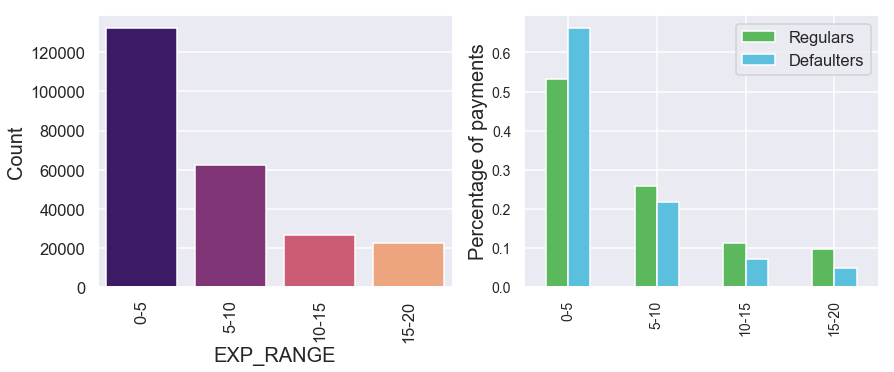

In [ ]:
compare_stats(df,'EXP_RANGE',True)

#### Points to be concluded from the above graph
    1) Most of the Applicants have below  5 years experience with next category 5-10 years 
       experience
    2) Maximum defaulters have below 5 years experience


## Univariate Analysis of Numerical Data

In [ ]:
print(df.AMT_INCOME_TOTAL.nunique(), df.AMT_INCOME_TOTAL.max())

1992 360000.0


In [ ]:
print(df.AMT_INCOME_TOTAL.quantile(.25), df.AMT_INCOME_TOTAL.quantile(.75),df.AMT_INCOME_TOTAL.quantile(1))
IQR = df.AMT_INCOME_TOTAL.quantile(.75) - df.AMT_INCOME_TOTAL.quantile(.25)
upper_fence = df.AMT_INCOME_TOTAL.quantile(.75) + (IQR*1.5)
print(upper_fence)

112500.0 202500.0 360000.0
337500.0


In [ ]:
len(df[df['AMT_INCOME_TOTAL']>=337500])

5833

#### There are 2016 unique values for AMT_INCOME_TOTAL which is way too many to capture on a graph. So we do binning. 
    1) There are also outliers. Anything above 337500 is considered an outlier data.


### Binning the numerical data for better analysis

In [ ]:
# Creating bins for income amount
def bin_plot(feature, binned_value, title, diff_range=False):
    if (diff_range == False):
        bins = [0,50000,100000,150000,200000,250000,300000,350000,400000]
        slot = ['0-50000','50000-100000','100000-150000', '150000-200000',
           '200000-250000','250000-300000','300000-350000','350000-400000']
    else:
        bins = [0,20000,40000,60000,80000, 100000, 120000, 140000]
        slot = ['0-20000','20000-40000','40000-60000', '60000-80000',
           '80000-100000','100000-120000','120000-140000']

    df[binned_value]=pd.cut(df[feature],bins,labels=slot)

    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 35
    plt.rcParams['axes.titlepad'] = 30
    temp = pd.Series(data = 'CODE_GENDER')
    fig, ax = plt.subplots()
    width = len(df[binned_value].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 4)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x= binned_value, order=df[binned_value].value_counts().index,hue='TARGET', palette='magma') 
    plt.show()

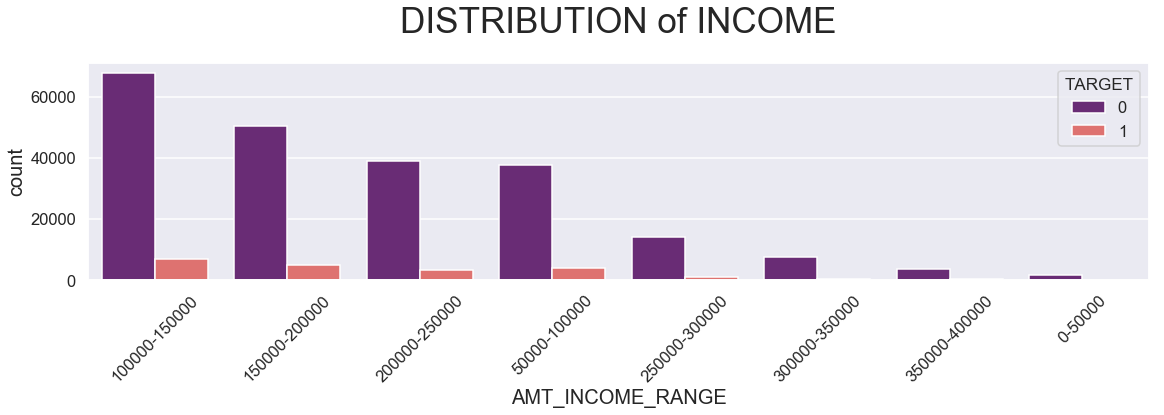

In [ ]:
bin_plot('AMT_INCOME_TOTAL', 'AMT_INCOME_RANGE', 'DISTRIBUTION of INCOME')

#### Points to be concluded from the above graph.
    1) Most of the applicants Income range is around 50k -250k 
    2) Most of the defaulters have income in the same range, maximum defaulters being in the income range 100k-150k


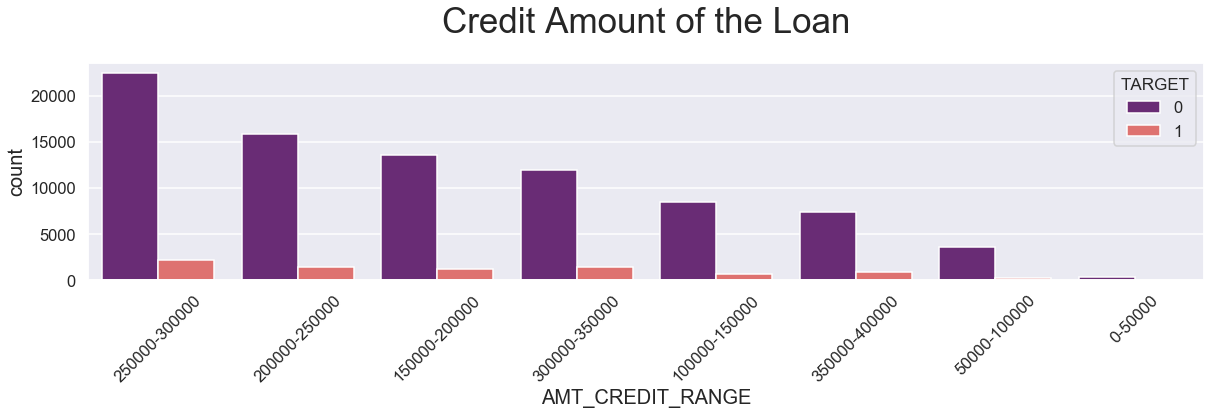

In [ ]:
bin_plot('AMT_CREDIT', 'AMT_CREDIT_RANGE', 'Credit Amount of the Loan')

#### Points to be concluded from the above graph.
    1) Maximum Loan applications are for Credit amount 250-300k
    2) Maximum Defaulters are the ones who are seeking the same credit amount


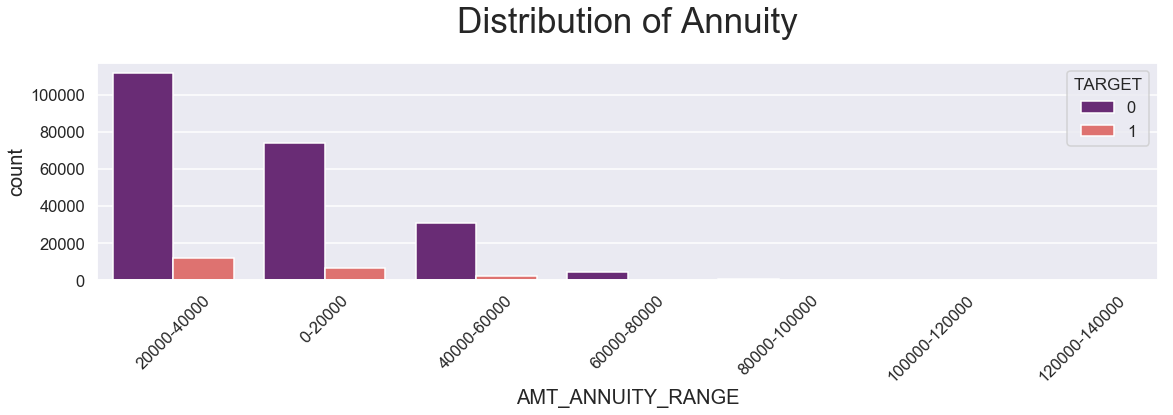

In [ ]:
bin_plot('AMT_ANNUITY', 'AMT_ANNUITY_RANGE', 'Distribution of Annuity', True)

#### Points to be concluded from the above graph.
    1) Maximum Applicants are paying an annuity of 20-40k
    2) People paying an annuity of 20-40k are the ones who are defaulting a lot
    3) People paying an annuity of 60k or more are hardly defaulting


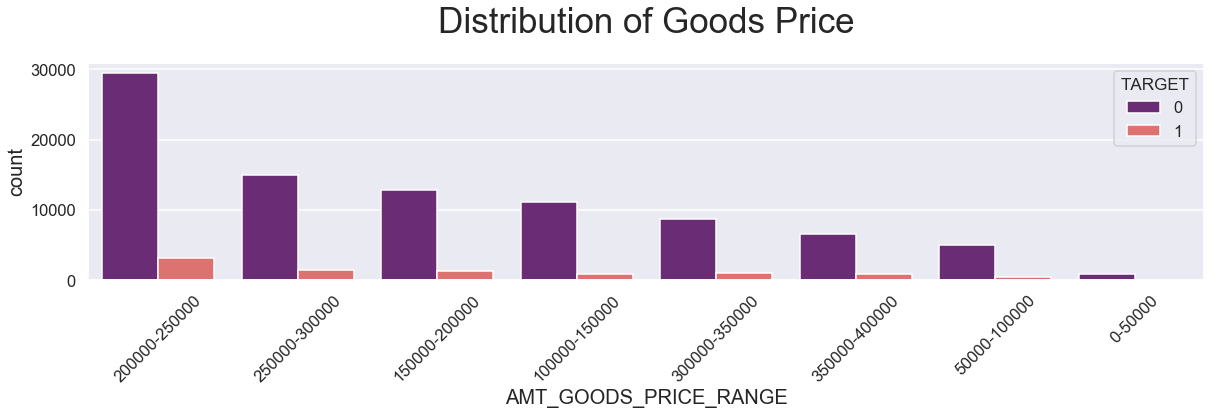

In [ ]:
bin_plot('AMT_GOODS_PRICE', 'AMT_GOODS_PRICE_RANGE', 'Distribution of Goods Price')

#### Points to be concluded from the above graph.
    1) The value of asset for which loan is sought maximum is in the range 200k-250k
    2) That is also the category in which there are maximum defaulters


### Splitting of Dataframe based on the Target Variable

In [ ]:
df_target0 =df.loc[df.TARGET==0]
df_target1 = df.loc[df.TARGET==1]

## Bivariate Analysis of Numerical Data

In [ ]:
def compare_stats_bivariate(var1,var2, title1, title2):
    plt.figure(figsize=(20,6))
    sns.set_color_codes("pastel")
    sns.set_style('darkgrid')
    plt.subplot(1, 2, 1)
    ax=plt.gca()
    ax.set_ylabel(var2, fontsize =14) # Y label
    ax.set_xlabel(var1, fontsize = 14) # X label
    sns.scatterplot(x=var1,y=var2,data=df_target0,palette='magma')
    plt.title(title1,size=16)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.yscale('log')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var1,y=var2,data=df_target1, palette='magma')
    plt.tick_params(axis='both', which='major', labelsize=14)
    ax=plt.gca()
    ax.set_ylabel(var2, fontsize =14) # Y label
    ax.set_xlabel(var1, fontsize = 14)
    plt.title(title2, size=16)
    #plt.yscale('log')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.show()

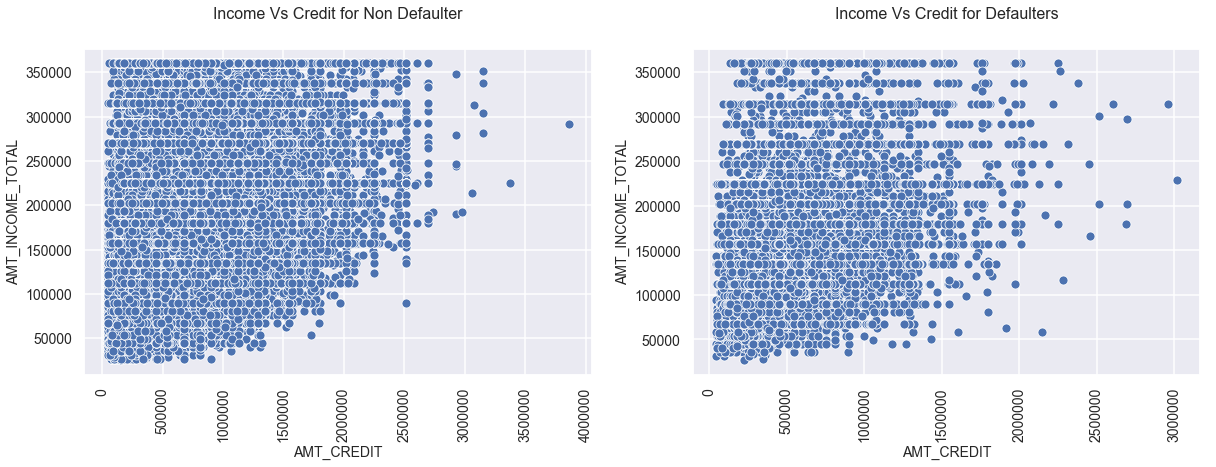

In [ ]:
compare_stats_bivariate('AMT_CREDIT','AMT_INCOME_TOTAL', 'Income Vs Credit for Non Defaulter', 'Income Vs Credit for Defaulters')

#### Points to be concluded from the above graph
    1) Lower density of defaults where income is higher than 300k 
    2) More defaults are in the range 0-150k


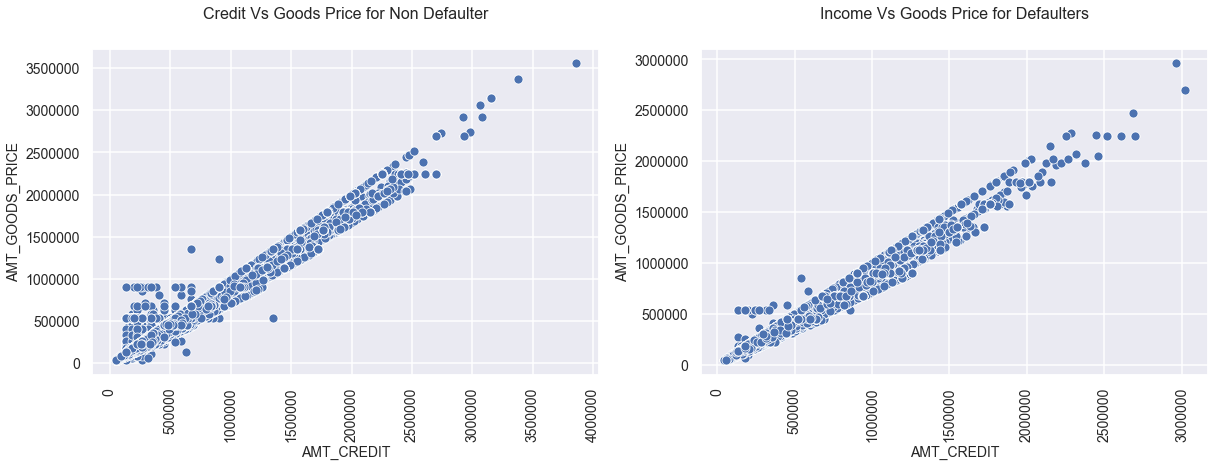

In [ ]:
compare_stats_bivariate('AMT_CREDIT','AMT_GOODS_PRICE', 'Credit Vs Goods Price for Non Defaulter', 'Income Vs Goods Price for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters are defaulting for the credit amount in the range 0 -200k
    

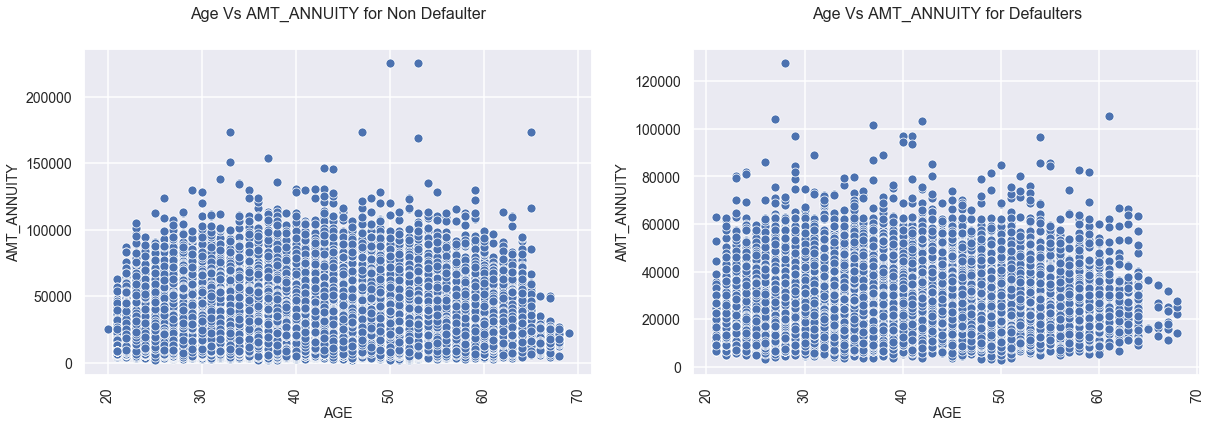

In [ ]:
compare_stats_bivariate('AGE', 'AMT_ANNUITY', 'Age Vs AMT_ANNUITY for Non Defaulter', 'Age Vs AMT_ANNUITY for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters are defaulting for the Annuity amount in the range 0 -60k


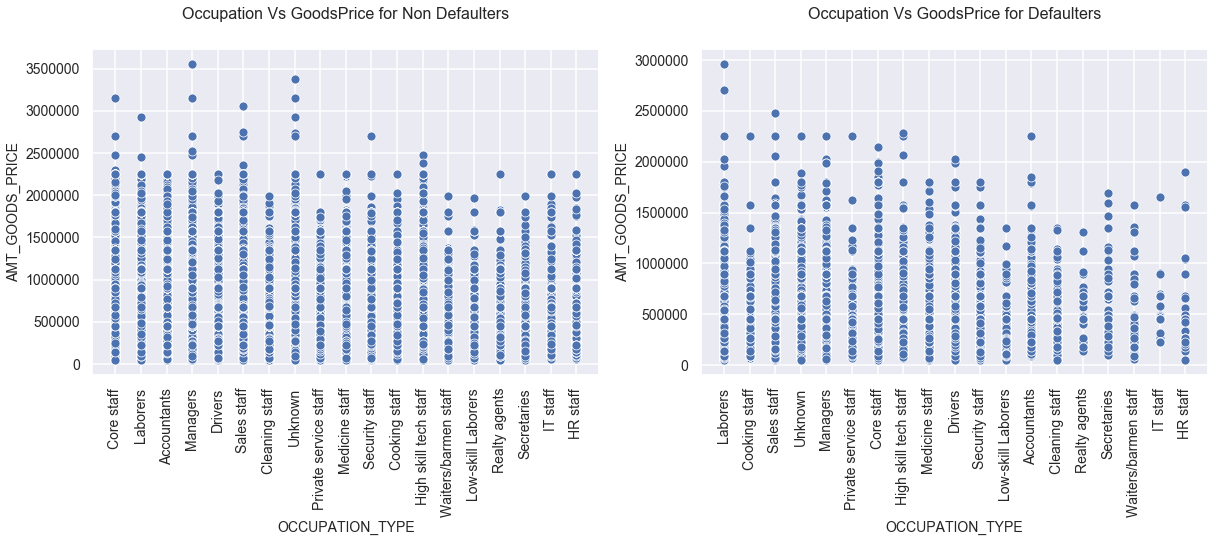

In [ ]:
compare_stats_bivariate('OCCUPATION_TYPE','AMT_GOODS_PRICE', 'Occupation Vs GoodsPrice for Non Defaulters', 'Occupation Vs GoodsPrice for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters are labourers, Core Staff , Sales staff ,Managers & Medicine for the Asset Price in the range
       of 0 – 150k


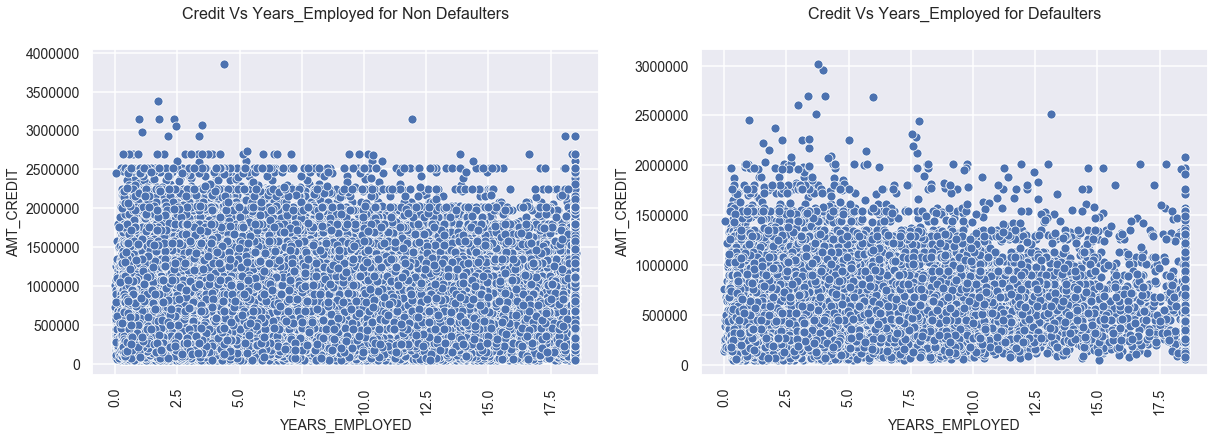

In [ ]:
compare_stats_bivariate('YEARS_EMPLOYED', 'AMT_CREDIT', 'Credit Vs Years_Employed for Non Defaulters', 'Credit Vs Years_Employed for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters fall in the credit limit range  between 0-1500k
    2)These defaulters have an experience around 0-15 years



## Bivariate Analysis of Categorical Data

In [ ]:
def plotting_bc(column,hue,title1,title2):
    
    col = column
    hue = hue
    
    fig = plt.figure(figsize=(20,10))

    ax1 = plt.subplot(121)
    ax1=plt.gca()
    ax1.set_ylabel(hue, fontsize =14) # Y label
    ax1.set_xlabel(column, fontsize = 14) # X label
    sns.countplot(x= col, hue=hue, data = df_target0, ax = ax1)
    plt.title(title1,size=16)    
    plt.xlabel(col)
    plt.xticks(rotation=90)
    
    ax2 = plt.subplot(122)
    ax2=plt.gca()
    ax2.set_ylabel(hue, fontsize =14) # Y label
    ax2.set_xlabel(column, fontsize = 14) # X label
    sns.countplot(x= col, hue=hue, data = df_target1, ax = ax2)
    plt.title(title2,size=16)   
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(col)
    plt.xticks(rotation=90)


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

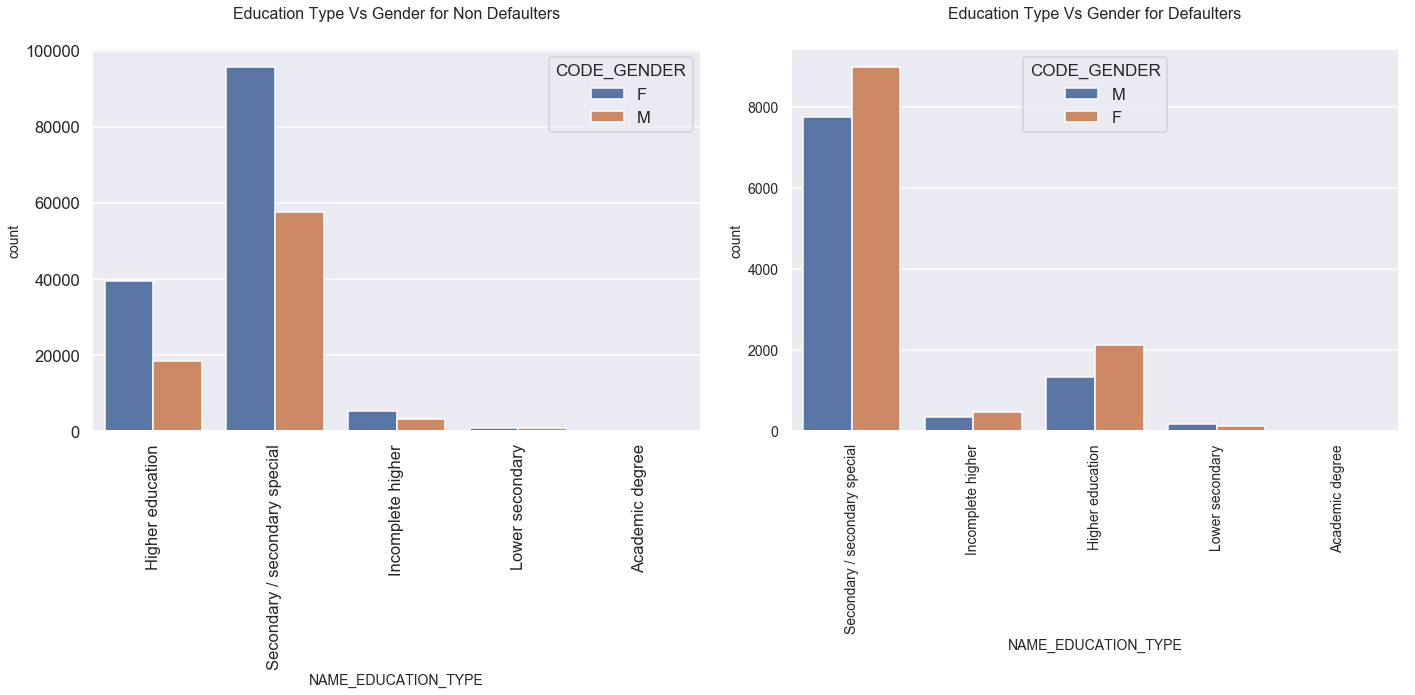

In [ ]:
plotting_bc('NAME_EDUCATION_TYPE', 'CODE_GENDER', 'Education Type Vs Gender for Non Defaulters', 'Education Type Vs Gender for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters are females with education levels of Secondary 
      and Higher Education


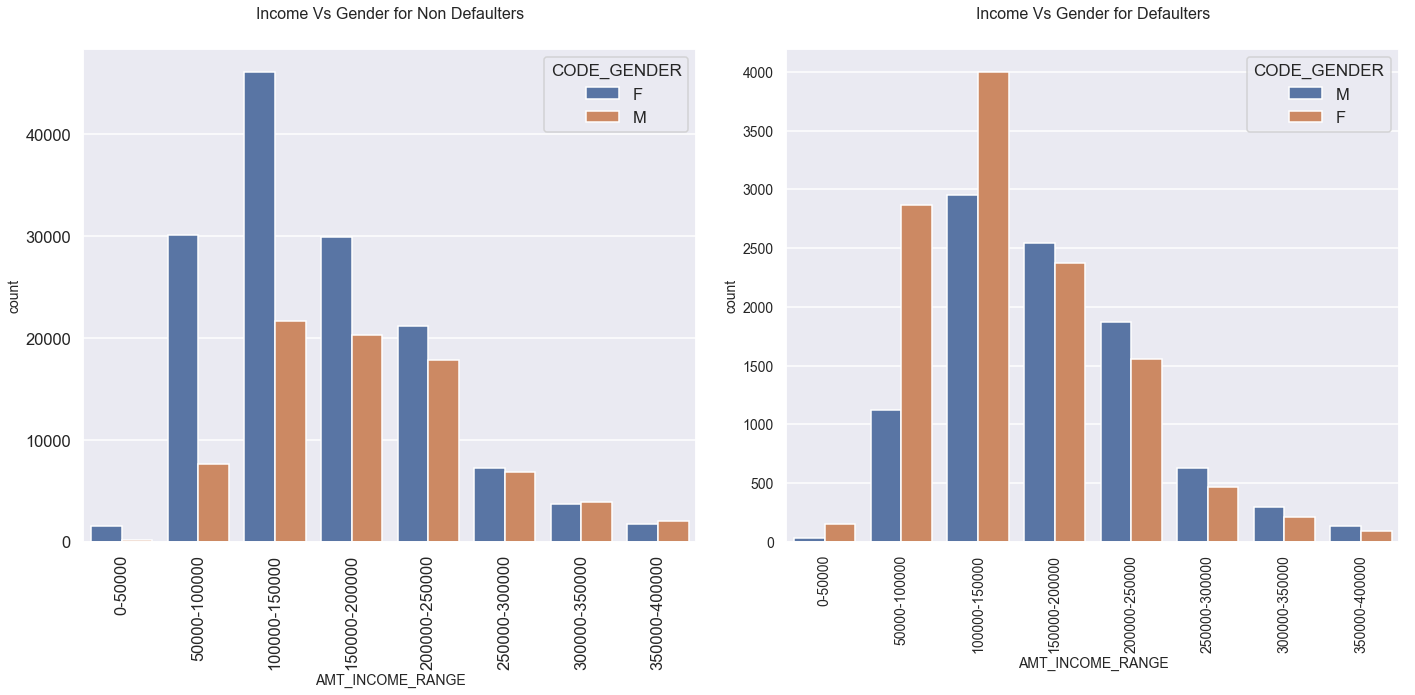

In [ ]:
plotting_bc('AMT_INCOME_RANGE', 'CODE_GENDER', 'Income Vs Gender for Non Defaulters', 'Income Vs Gender for Defaulters')

####Points to be concluded from the above graph

    1) Most of the defaulters are females with income range 50k-150k

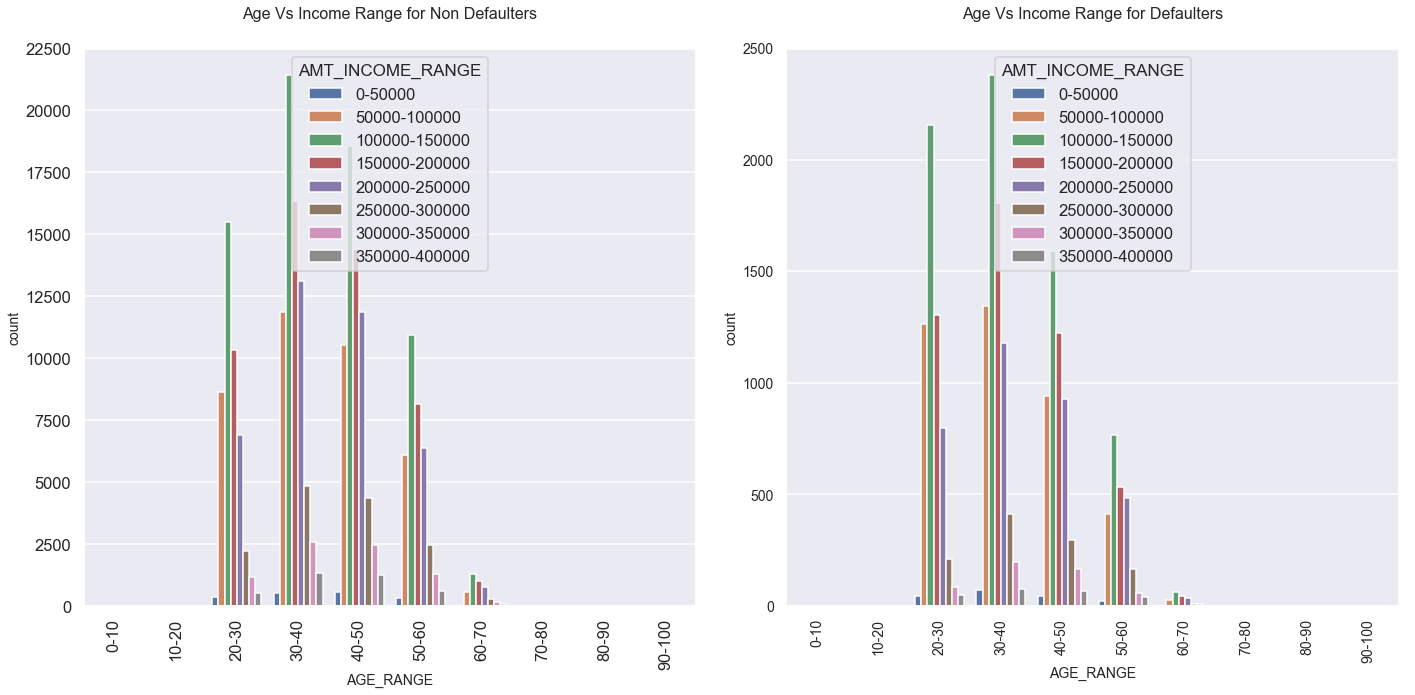

In [ ]:
plotting_bc('AGE_RANGE','AMT_INCOME_RANGE', 'Age Vs Income Range for Non Defaulters', 'Age Vs Income Range for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters belong to the income group 100-150k 
    2) Defaulters are less in the age group 60-70 years


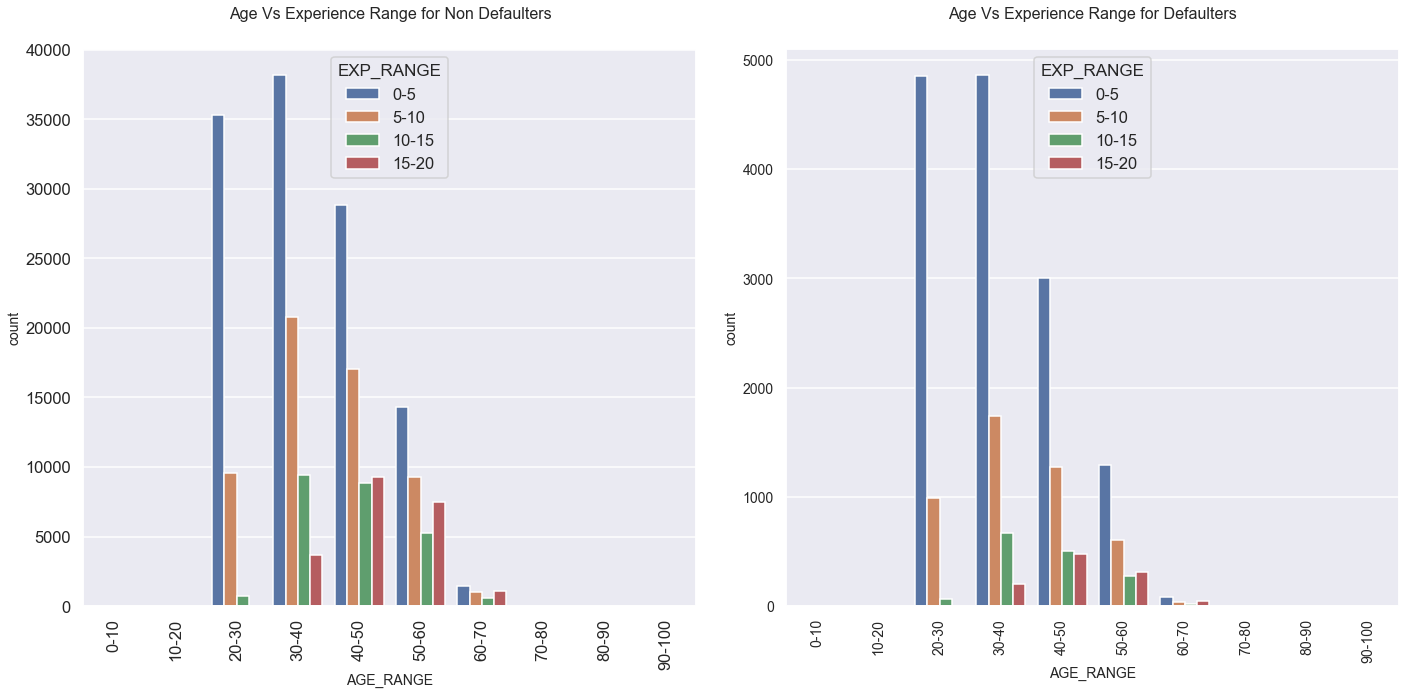

In [ ]:
plotting_bc('AGE_RANGE', 'EXP_RANGE', 'Age Vs Experience Range for Non Defaulters', 'Age Vs Experience Range for Defaulters')

#### Points to be concluded from the above graph
    1) Most of the defaulters have an experience of 0-5 years and they fall into the age 
       category 20-30, 30-40 and 40-50 yrs


##  Load previous application data

In [ ]:
df_1 = pd.read_csv('previous_application.csv')

In [ ]:
df_1.shape

(1670214, 37)

In [ ]:
df_1.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [ ]:
df_1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Data Inspection and Cleaning

In [ ]:
((df_1.isnull().sum()[df_1.isnull().sum() > 0]/len(df_1)).round(6) * 100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED     99.6437
RATE_INTEREST_PRIMARY        99.6437
RATE_DOWN_PAYMENT            53.6365
AMT_DOWN_PAYMENT             53.6365
NAME_TYPE_SUITE              49.1198
NFLAG_INSURED_ON_APPROVAL    40.2981
DAYS_TERMINATION             40.2981
DAYS_LAST_DUE                40.2981
DAYS_LAST_DUE_1ST_VERSION    40.2981
DAYS_FIRST_DUE               40.2981
DAYS_FIRST_DRAWING           40.2981
AMT_GOODS_PRICE              23.0818
AMT_ANNUITY                  22.2867
CNT_PAYMENT                  22.2864
PRODUCT_COMBINATION           0.0207
AMT_CREDIT                    0.0001
dtype: float64

In [ ]:
# Get all the columns having more than 40% missing values
missing_columns = df_1.columns[100*(df_1.isnull().sum()/len(df.index)) >=40]
print(missing_columns)
len(missing_columns)

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


14

### Drop all the columns with missing values more than 40%

In [ ]:
df_1 = df_1.drop(missing_columns, axis=1)
df_1.shape

(1670214, 23)

In [ ]:
((df_1.isnull().sum()[df_1.isnull().sum() > 0]/len(df_1)).round(6) * 100).sort_values(ascending=False)

PRODUCT_COMBINATION    0.0207
AMT_CREDIT             0.0001
dtype: float64

In [ ]:
df_1.shape

(1670214, 23)

In [ ]:
df_1.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
#Fill up the nulls in the PRODUCT_COMBINATION column with the mode value
df_1['PRODUCT_COMBINATION'] = df_1['PRODUCT_COMBINATION'].fillna(df_1['PRODUCT_COMBINATION'].mode()[0])

In [ ]:
#Fill up the nulls in the AMT_CREDIT column with the mean value (since it is float data type)
df_1['AMT_CREDIT'] = df_1['AMT_CREDIT'].fillna(df_1['AMT_CREDIT'].mean())

In [ ]:
((df_1.isnull().sum()[df_1.isnull().sum() > 0]/len(df_1)).round(6) * 100).sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
df_1.shape

(1670214, 23)

### Merge the Application dataset with previous application dataset

In [ ]:
new_df=pd.merge(left=df,right=df_1,how='inner',on='SK_ID_CURR')

In [ ]:
new_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS

In [ ]:
new_df.shape

(1101478, 73)

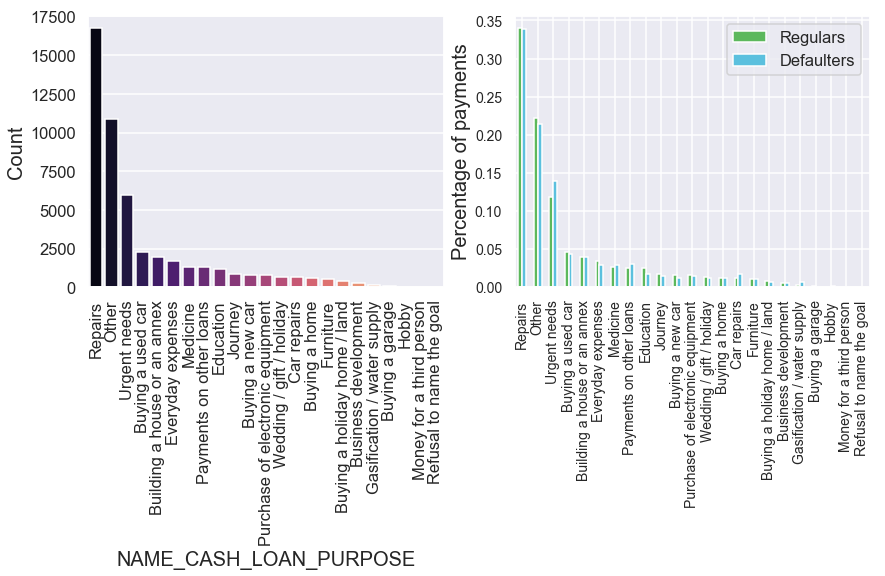

In [ ]:
compare_stats(new_df[(new_df['NAME_CASH_LOAN_PURPOSE']!='XNA') & (new_df['NAME_CASH_LOAN_PURPOSE']!='XAP')], 'NAME_CASH_LOAN_PURPOSE',True)

#### Points to be concluded from the above graph
    1) The Reasons for applying for a loan are mostly for Repairs, Other, Urgent Needs & Buying a used car
    2) Defaulters of loan are mainly from the category 'Repairs, Other and Urgent Needs' 
    and who borrowed for investing in a hobby

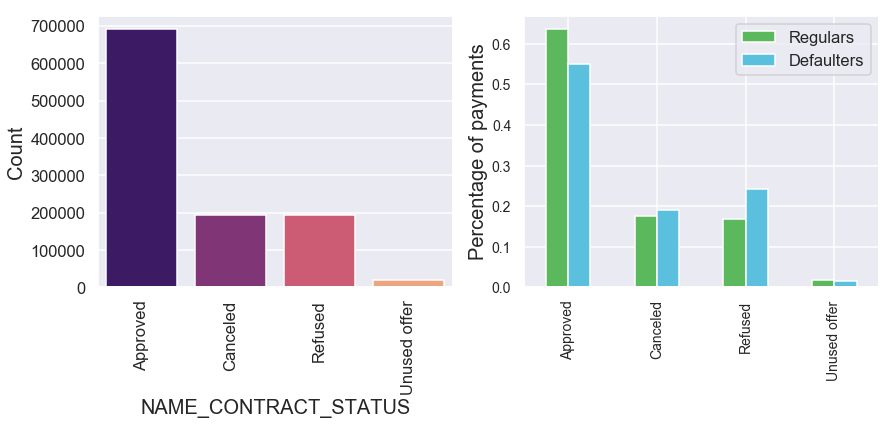

In [ ]:
compare_stats(new_df, 'NAME_CONTRACT_STATUS', True)

#### Points to be concluded from the above graph
    1. Of all the Loans applied, most of them have been approved. Some have been Cancelled or Refused. Some have been unused
    2) Most of the defaults are from those loans which have been approved


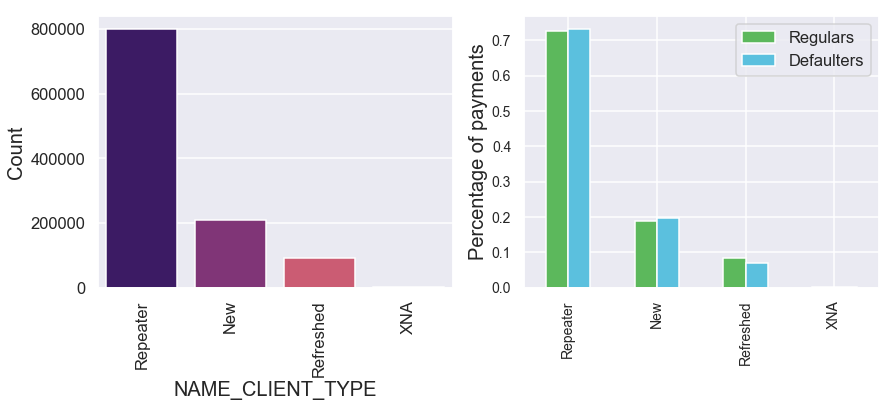

In [ ]:
compare_stats(new_df, 'NAME_CLIENT_TYPE',True)

#### Points to be concluded from the above graph
    1. Repeat Customers are also defaulting on the loans


In [ ]:
new_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               N             0          270000.0     1293502.5      35698.5   
3               N             0          270000.0     1293502.5      35698.5   
4               Y             0           67500.0      135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2        1129500.0          Family    State servant   
3        1129500.0          Family    State servant   
4         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.003541       16765           1188               1186   
4                    0.010032       19046            225               4260   

   DAYS_ID_PUBLISH  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120                 1        Laborers                1   
1             -291                 1      Core staff                2   
2             -291                 1      Core staff                2   
3             -291                 1      Core staff                2   
4            -2531                 1        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                         

### Comparison between Application and Previous Application

In [ ]:
def plotting_c(new_df,column,column1,title1):
    col = column
    col1 = column1
    
    fig = plt.figure(figsize=(10,10))
    
    ax1= plt.subplot(111)
    df1 = pd.DataFrame()
    df1['Prev_App']= ((new_df[col].value_counts())/len(new_df))
    df1['App']= ((new_df[col1].value_counts())/len(new_df))
    df1.plot.bar(ax=ax1)
    plt.title(title1, size=16)
    
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

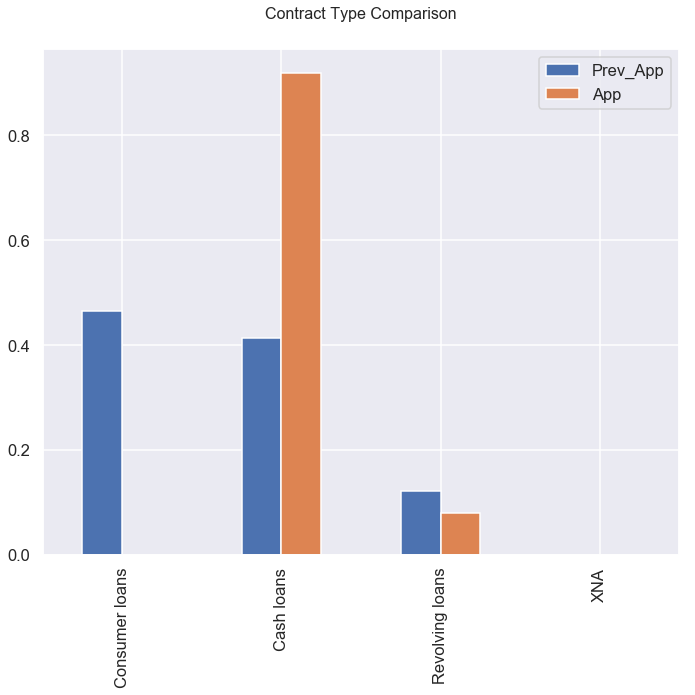

In [ ]:
plotting_c(new_df,'NAME_CONTRACT_TYPE_y','NAME_CONTRACT_TYPE_x','Contract Type Comparison')

#### Points to be concluded from the above graph
    1. Previous Application Data also has Consumer loans along with Cash & Revolving Loans


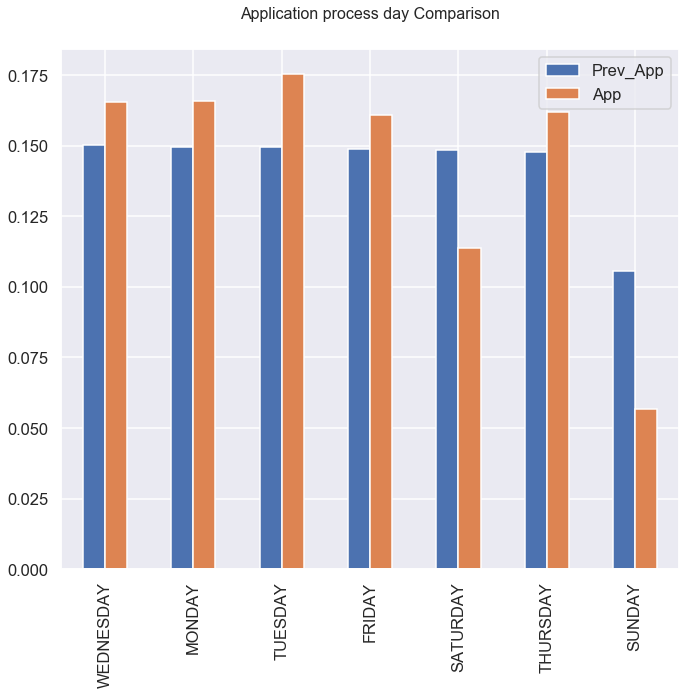

In [ ]:
plotting_c(new_df,'WEEKDAY_APPR_PROCESS_START_y','WEEKDAY_APPR_PROCESS_START_x','Application process day Comparison')

#### Points to be concluded from the above graph
    1. According the Previous Application Data, All Week days are engaged in processing loan Applications equally except 
       Sundays where as in current Application Data, Tuesdays are when most applications are processed 


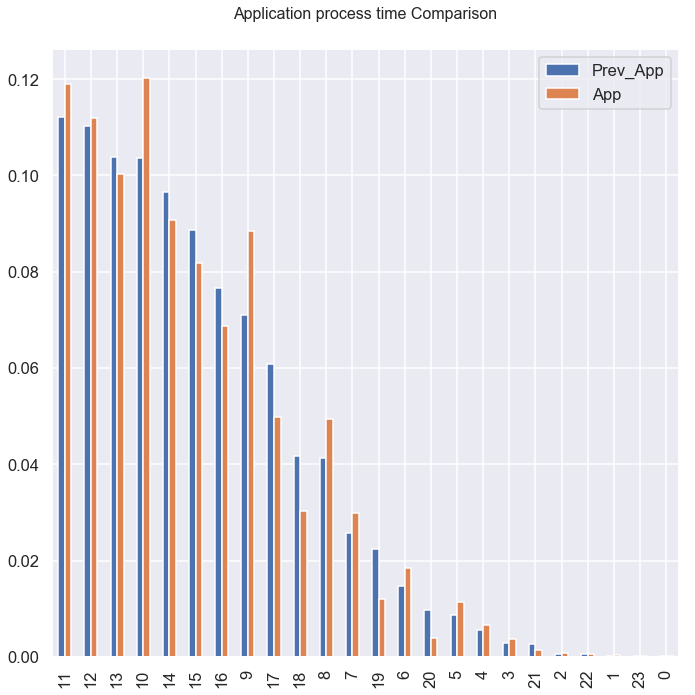

In [ ]:
plotting_c(new_df,'HOUR_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_x','Application process time Comparison')

#### Points to be concluded from the above graph
    1. According to Previous Application Data, the time interval of processing Loan Applications the most is 11-12 am while in Current Application Data, it is 10-11 am

## Top 10 Correlations

In [ ]:
df_target0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

In [ ]:
df_target01 = df_target0.copy()

In [ ]:
df_target01.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHA

In [ ]:
df_target01.drop(['SK_ID_CURR','TARGET','AGE','YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_LAST_PHONE_CHANGE','AGE_RANGE', 'EXP_RANGE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE'],axis=1, inplace=True)

In [ ]:
df_target01.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1, inplace=True)

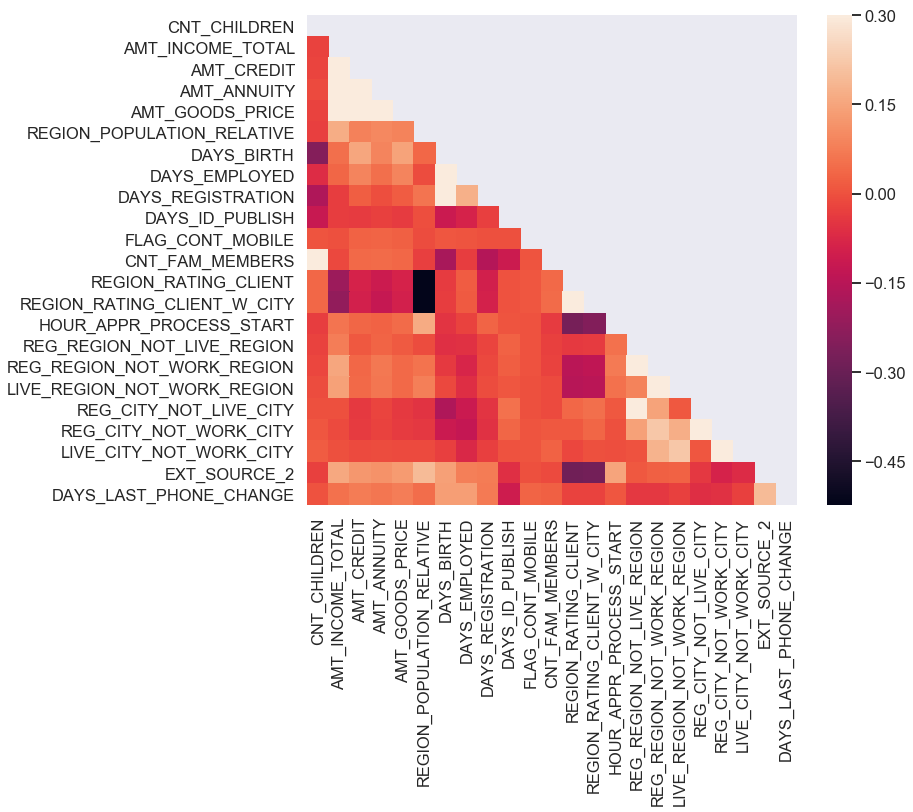

In [ ]:
corr = df_target01.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

In [ ]:
correlation_0 = df_target01.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind='quicksort')
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0 ]
print(correlation_0.tail(10))


LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820155
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820155
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860388
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860388
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.890078
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.890078
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949275
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949275
AMT_GOODS_PRICE              AMT_CREDIT                     0.985697
AMT_CREDIT                   AMT_GOODS_PRICE                0.985697
dtype: float64


#### Points to be concluded from the above correlation matrix

Regular Payers have high correlation between below columns

1. AMT_GOODS_PRICE & AMT_CREDIT
2. AMT_CREDIT & AMT_GOODS_PRICE 
3. REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT

In [ ]:
df_target11 = df_target1.copy()

In [ ]:
df_target11.columns

In [ ]:
df_target11.drop(['SK_ID_CURR','TARGET','AGE','YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_LAST_PHONE_CHANGE','AGE_RANGE', 'EXP_RANGE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','AMT_ANNUITY_RANGE', 'AMT_GOODS_PRICE_RANGE'],axis=1, inplace=True)

In [ ]:
df_target11.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1, inplace=True)

In [ ]:
corr = df_target11.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

In [ ]:
correlation_1 = df_target11.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(10))

#### Points to be concluded from the above correlation matrix

Defaulters have high correlation between below columns

1. AMT_GOODS_PRICE & AMT_CREDIT
2. AMT_CREDIT & AMT_GOODS_PRICE 
3. REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT